In [33]:
import networkx as nx
import pandas as pd
import numpy as np
import ctypes
import matplotlib.colors as clr
import matplotlib.pyplot as plt

In [3]:

G = nx.read_edgelist("../social_networks/social_network.edgelist", encoding='utf-8', nodetype=int)
#G = nx.convert_node_labels_to_integers(G, first_label=1, ordering="sorted")

In [4]:
df = pd.read_csv("../social_networks/social_network.struc2vec", skiprows=1, sep=' ', header=None, index_col=0).sort_index()
df_train = pd.read_csv("../social_networks/social_network.train", sep=' ', header=None, index_col=0).sort_index()

u_ids = [i for i in df.index if i not in df_train.index]
c_ids = [j for j in df_train[df_train[1] == 1].index]
f_ids = [j for j in df_train[df_train[1] == 0].index]

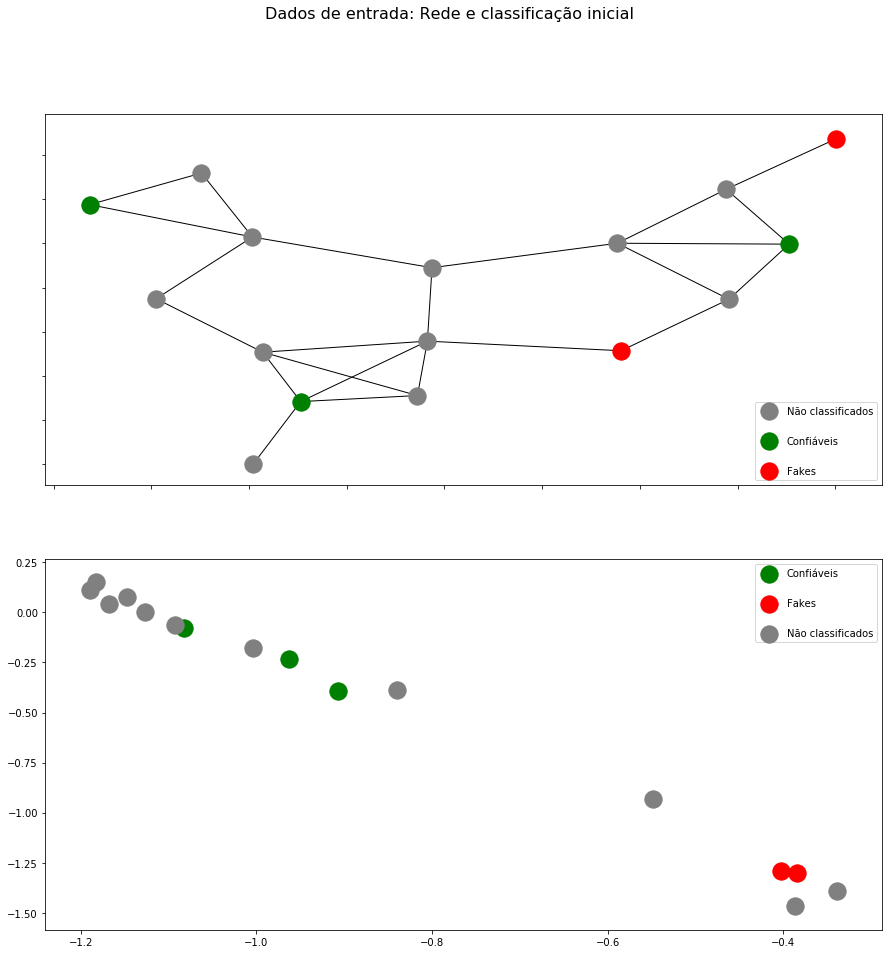

In [5]:

fig, ax = plt.subplots(figsize=(15,15))
fig.suptitle(u'Dados de entrada: Rede e classificação inicial', fontsize=16)

ax1=plt.subplot(2, 1, 1)
#x.draw_kamada_kawai(G,node_color = color_map, label = 'a')
pos=nx.kamada_kawai_layout(G)
nx.draw_networkx_nodes(G, pos=pos, nodelist=u_ids,node_color='grey', label=u'Não classificados')
nx.draw_networkx_nodes(G, pos=pos, nodelist=c_ids,node_color='green', label=u'Confiáveis')
nx.draw_networkx_nodes(G, pos=pos, nodelist=f_ids,node_color='red', label='Fakes')
nx.draw_networkx_edges(G, pos=pos)
ax1.legend(labelspacing=2, loc='lower right')
ax1.set_yticklabels([])
ax1.set_xticklabels([])

groups = np.where(np.isin(df.index, u_ids), 3, np.where(np.isin(df.index, c_ids), 1, 2 ) )
labels= {1: u'Confiáveis', 2: 'Fakes', 3: u'Não classificados'}
cdict = {1: 'green', 2: 'red', 3: 'gray'}
ax1=plt.subplot(2, 1, 2)
for g in np.unique(groups):
    ix = df[groups == g].index
    ax1.scatter(df.loc[ix,1], df.loc[ix, 2], c = cdict[g], label = labels[g], s = 300)
# ax1.scatter(df[1][df_train[df_train[1] == 1].index], df[2][df_train[df_train[1] == 1].index], c='green', s=300)
# ax1.scatte r(df[1][df_train[df_train[1] == 0].index], df[2][df_train[df_train[1] == 0].index], c='red', s=300)
# ax1.scatter(df.loc[[i for i in df.index if i not in df_train.index], 1], df.loc[[i for i in df.index if i not in df_train.index], 2], c='gray', s=300)
ax1.legend(labelspacing=2, loc='upper right')
plt.show()

In [6]:
#training

In [7]:
df_train.columns = ['confiavel']

In [8]:
df_train = pd.concat([df, df_train], axis=1, join='inner')

In [9]:
X = df_train.loc[:, [1,2]].values
y = df_train.loc[:, 'confiavel'].values

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X,y)

/home/caio/.local/lib/python2.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [11]:
y_pred_proba = lr.predict_proba(df)

In [12]:
threshold = 0.5
y_pred = np.where(y_pred_proba.T[1] > threshold, 1, 0)

In [13]:
c_ids = [j for j in df[y_pred == 1].index]
f_ids = [j for j in df[y_pred == 0].index]

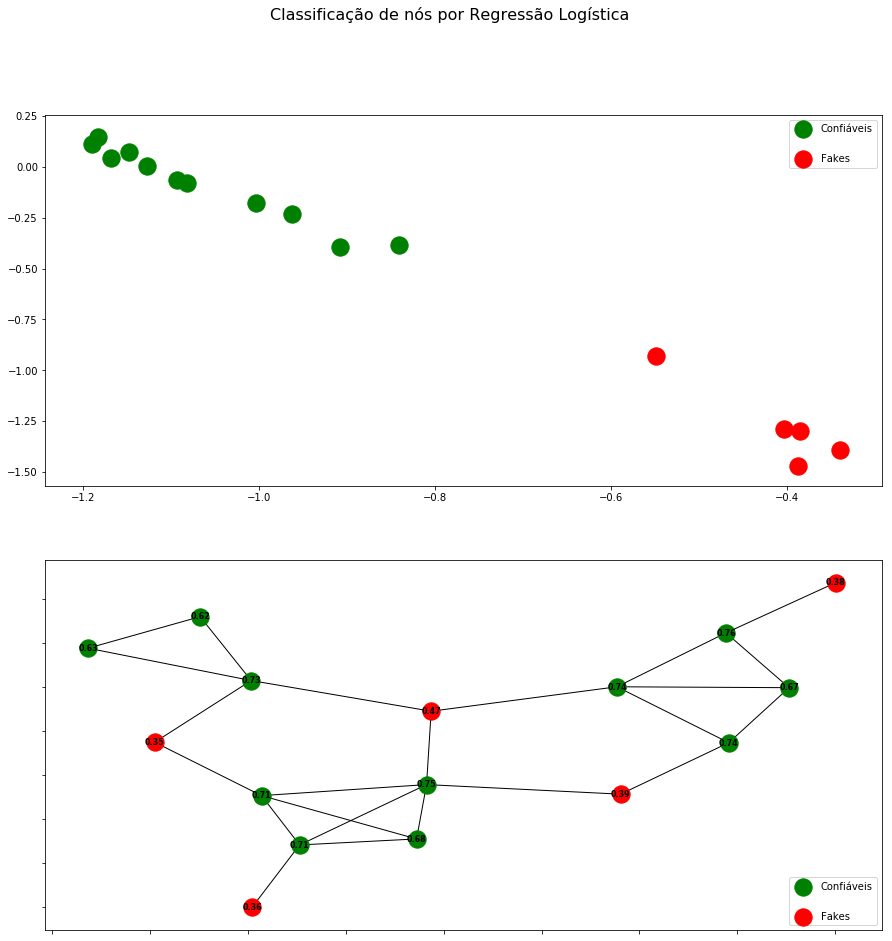

In [14]:
labels= {1: u'Confiáveis', 2: 'Fakes'}
cdict = {1: 'green', 2: 'red'}
groups = np.where(np.isin(df.index, c_ids), 1, 2 )
fig, ax = plt.subplots(figsize=(15,15))
fig.suptitle(u'Classificação de nós por Regressão Logística', fontsize=16)
ax1=plt.subplot(2, 1, 1)
for g in np.unique(groups):
    ix = df[groups == g].index
    ax1.scatter(df.loc[ix,1], df.loc[ix, 2], c = cdict[g], label = labels[g], s = 300)
ax1.legend(labelspacing=2, loc='upper right')


ax1=plt.subplot(2, 1, 2)
pos=nx.kamada_kawai_layout(G)
nx.draw_networkx_labels(G,pos=pos, labels={k+1:round(v[1],2) for k,v in enumerate(y_pred_proba)}, font_size=8, font_weight='bold')
nx.draw_networkx_nodes(G, pos=pos, nodelist=c_ids,node_color='green', label=u'Confiáveis')
nx.draw_networkx_nodes(G, pos=pos, nodelist=f_ids,node_color='red', label='Fakes')
nx.draw_networkx_edges(G, pos=pos)
ax1.legend(labelspacing=2, loc='lower right')
ax1.set_yticklabels([])
ax1.set_xticklabels([])


plt.show()

In [63]:
cmap = clr.LinearSegmentedColormap.from_list('custom blue', 
                                             [(0,    '#ff0000'),
                                              (1, '#00ff00')], N=256)

In [79]:
enumerate(result).keys()

AttributeError: 'enumerate' object has no attribute 'keys'

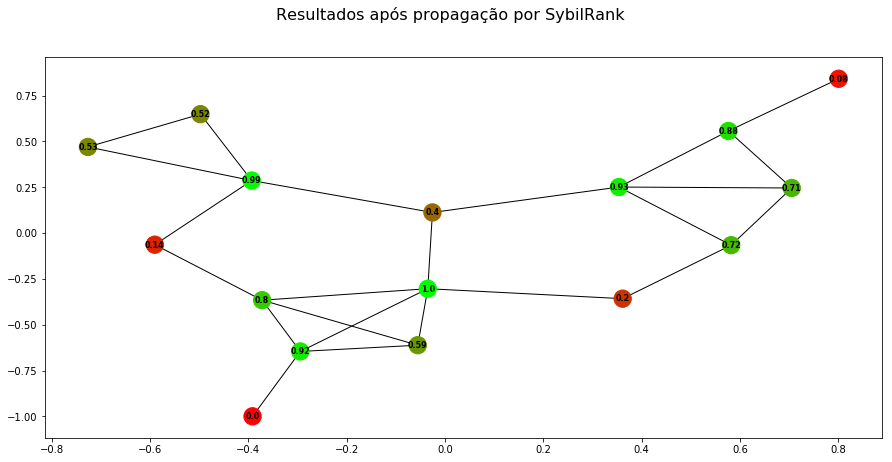

In [86]:
result = pd.read_csv("../social_networks/social_network.realrank", sep=' ', header=None, index_col=0).sort_index()
fig, ax = plt.subplots(figsize=(15,7))
fig.suptitle(u'Resultados após propagação por SybilRank', fontsize=16)
ax1=plt.subplot(1,1,1)
pos=nx.kamada_kawai_layout(G)
node_color = result.to_dict()[1]
nx.draw_networkx_labels(G,pos=pos, labels={k+1:round(v,2) for k,v in enumerate(result.values.ravel().T)}, font_size=8, font_weight='bold')
nx.draw_networkx_nodes(G, cmap=cmap, pos=pos, vmin=0, vmax=1, node_color=[v for k,v in node_color.items()])
nx.draw_networkx_edges(G, pos=pos)
# ax1.legend(labelspacing=2, loc='lower right')
# ax1.set_yticklabels([])
# ax1.set_xticklabels([])
